In [1]:
from  scipy import ndimage
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as mpimg
import spectral as sp
import numpy as np

In [2]:
whale1 = mpimg.imread("whale1.jpeg")
whale2 = mpimg.imread("whale2.jpeg")

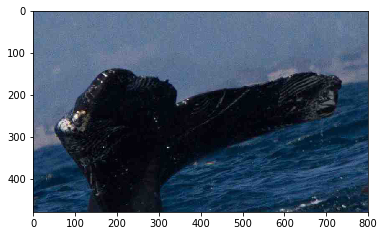

In [3]:
plt.imshow(whale1)

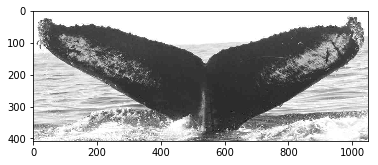

In [4]:
plt.imshow(whale2)

In [5]:
from sklearn.cluster import KMeans

In [6]:
whale1.shape

(480, 800, 3)

In [7]:
whale1 = whale1.flatten().reshape(384000,3)

In [8]:
y_whale1 = KMeans(n_clusters=3, random_state=1234).fit_predict(whale1)

In [9]:
y_whale1 = y_whale1.reshape(384000,1)

In [10]:
y_whale1 = y_whale1.reshape(480, 800)

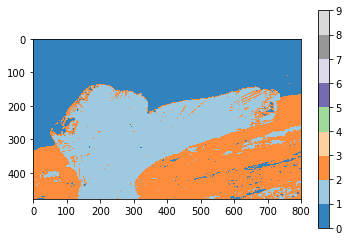

In [11]:
cmap = cm.get_cmap('tab20c', 9)    # 11 discrete colors
im = plt.imshow(y_whale1, cmap=cmap, vmin=0, vmax=9)
plt.colorbar(ticks=np.linspace(0,9,10))
plt.show()

In [12]:
whale2.shape

(408, 1050, 3)

In [13]:
whale2 = whale2.flatten().reshape(428400,3)

In [14]:
y_whale2 = KMeans(n_clusters=3, random_state=1234).fit_predict(whale2)

In [15]:
y_whale2 = y_whale2.reshape(428400,1)
y_whale2 = y_whale2.reshape(408, 1050)

In [16]:
#plt.imsave('Whale2-Kmean.png', y_whale2, cmap=cmap, vmin=0, vmax=9)

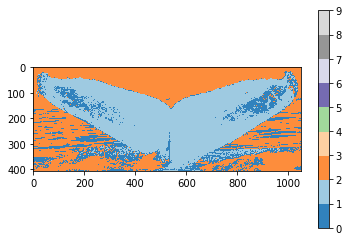

In [17]:
cmap = cm.get_cmap('tab20c', 9)    # 11 discrete colors
im = plt.imshow(y_whale2, cmap=cmap, vmin=0, vmax=9)
plt.colorbar(ticks=np.linspace(0,9,10))
plt.show()

In [18]:
#plt.imsave('Whale1-Kmean.png', y_whale1, cmap=cmap, vmin=0, vmax=9)

In [19]:
import skfuzzy as fuzz

In [20]:
alldata = np.vstack(whale1.flatten().reshape(384000,3))

In [21]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        whale1.flatten().reshape(384000,3).T, 3, 2, error=0.005, maxiter=1000, init=None)

In [22]:
cluster_membership = np.argmax(u, axis=0)

In [23]:
cluster_membership=cluster_membership.reshape(384000,1)

In [24]:
cluster_membership = cluster_membership.reshape(480, 800)

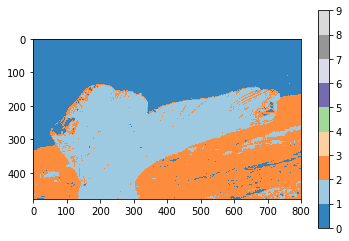

In [25]:
cmap = cm.get_cmap('tab20c', 9)    # 11 discrete colors
im = plt.imshow(cluster_membership, cmap=cmap, vmin=0, vmax=9)
plt.colorbar(ticks=np.linspace(0,9,10))
plt.show()

In [26]:
plt.imsave('Whale1-FCM.png', cluster_membership, cmap=cmap, vmin=0, vmax=9)